In [2]:
import sys
sys.path.append('../')

from model import *
from lib.training import *
from lib.preprocessing import *
from lib.dataloading import *
from lib.loss_functions import *
from lib.evaluation import *
from torchvision import transforms
from torch import optim, nn
import random
%matplotlib inline

In [3]:
from lib.preprocessing.joint_transforms import get_transformer_norm

In [4]:
transform = get_transformer_norm()
img_dir = '/mnt/DL_swRESTORED/Data/thyroid-ultrasound/Image-slc-train/'
mask_dir = '/mnt/DL_swRESTORED/Data/thyroid-ultrasound/Mask-slc-train/'
dataset = SingleClassDataset_Gray(img_dir = img_dir, mask_dir = mask_dir, list_id = None,
                                           transform = None, ori_ext = '*.png', mask_ext = '*.png') 

In [21]:
img.shape

(360, 560, 3)

In [24]:
img_dir = '/mnt/DL_swRESTORED/Data/ultrasound-nerve-segmentation/train_ori/'
mask_dir = '/mnt/DL_swRESTORED/Data/ultrasound-nerve-segmentation/train_mask/'
dataset = SingleClassDataset_Gray(img_dir = img_dir, mask_dir = mask_dir, list_id = None,
                                           transform = None, ori_ext = '*.tif', mask_ext = '*.tif') 

In [4]:
img_dir = '/mnt/DL_sw/Data/ultrasound-nerve-segmentation/train_ori/'
mask_dir = '/mnt/DL_sw/Data/ultrasound-nerve-segmentation/train_mask/'
trainer = NerveSegNetworkTrainer(img_dir = img_dir, mask_dir = mask_dir,
                            network = 'vgg-ce-unet',
                            opt = 'adam',
                            lr = 0.0001,                            
                            loss_fx = 'BCE',
                            batch_size = 4,
                            epochs = 10,
                            pretrain = False,
                            self_train = "",
                            freeze = False,
                            shrink = 1.0,
                            experiment = 'TEST',
                            gpu = '0')

Network initizliation:
Training Number: 4508
Validation Number: 1128


In [123]:
dice(mask,mask)

tensor([0.9813])

In [124]:
pred_mask = trainer.network(img)

In [125]:
dice(mask,pred_mask)

tensor([0.0264], grad_fn=<DivBackward0>)

In [57]:
trainer.network

VGGCEUNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128

In [5]:
trainer.network.to(trainer.device)
loaded_state = torch.load('/mnt/Liver/GE_study_hri/ContextEncoder/results/downstream/nerve/dt-nerve-p-d-best/epoch167.pth',map_location='cuda:0')
trainer.network.load_state_dict(loaded_state)
trainer.network.eval()

for img, mask in trainer.train_loader:
    img, mask = img.to(trainer.device), mask.to(trainer.device)
    mask_pred = trainer.network(img)
    loss = trainer.criterion(mask_pred, mask)
    print(loss)
    break

tensor(0.0122, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


In [6]:
trainer.evaluate(trainer.val_loader)

0.6816713213920593
0.8638872504234314
0.8405748605728149
0.7182286381721497
0.4700038433074951
0.5448580980300903
0.7032976746559143
1.0
0.5459861755371094
0.4305707514286041
0.6722378730773926
0.7883118391036987
0.6222953796386719
0.19508729875087738
0.5901584029197693
0.5440232753753662
0.38689708709716797
0.5344595313072205
0.6116248369216919
0.36507168412208557
0.3793420195579529
0.0011111111380159855
0.41885560750961304
0.0005200207815505564
0.5449551343917847
0.010882183909416199
0.3267776072025299
0.6095651388168335
0.5382370352745056
0.0002660534519236535
0.0006624684319831431
0.49723681807518005
0.582919180393219
0.5790947675704956
0.5
0.5234310626983643
0.40225502848625183
0.689355194568634
0.7436115145683289
0.826662003993988
0.44180116057395935
0.5383238196372986
0.5877112746238708
1.0
0.0003752306802198291
0.48102378845214844
0.6277318596839905
0.8288218975067139
0.7688999176025391
0.00035723394830711186
0.0011116914683952928
0.04549647867679596
0.006516285240650177
0.6709

/home/jimmy/anaconda3/envs/dl/lib/python3.7/site-packages/imageio/plugins/_tifffile.py:8388: UserWarning: unexpected end of LZW stream (code 0)
  warnings.warn('unexpected end of LZW stream (code %i)' % code)


0.6274763345718384
0.7726248502731323
0.04916371777653694
0.7414236068725586
0.5145618319511414
0.8243704438209534
0.0005672149709425867
0.00021922150335740298
0.8956752419471741
0.0012285012053325772
0.1383896917104721
0.5645561218261719
0.00034118047915399075
0.822268545627594
0.433072566986084
0.5768478512763977


/home/jimmy/anaconda3/envs/dl/lib/python3.7/site-packages/imageio/plugins/_tifffile.py:8388: UserWarning: unexpected end of LZW stream (code 514)
  warnings.warn('unexpected end of LZW stream (code %i)' % code)


0.5718675255775452
0.0006045949412509799
0.3662264347076416
0.11120263487100601
0.8297183513641357
0.6260437965393066
0.5455851554870605
1.0
0.5871046185493469
0.3204707205295563
0.11669844388961792
0.5942405462265015
0.5173865556716919
0.6429131031036377
0.42642396688461304
0.8052114248275757
0.5848568677902222
0.0033112582750618458
0.7245433926582336
0.00019738446280825883
0.0005257623270153999
0.7599124312400818
0.5045353174209595
0.5523819923400879
1.0
0.132100448012352
0.881379246711731
0.6426378488540649
0.0014641288435086608
0.000379982782760635
0.0004434589936863631
0.029974984005093575
0.6279118657112122
0.6225532293319702
0.8501800894737244
0.6435370445251465
0.25305989384651184
0.0007446016534231603
0.6032939553260803
0.6611962914466858
0.7472876310348511
0.7424055337905884
0.6553542613983154
0.8455711603164673
0.00016341524315066636
0.0005037783412262797
0.5185967683792114
0.6006544828414917
0.8047091364860535
0.7070153951644897
0.6361451148986816
0.00037432016688399017
0.6

/home/jimmy/anaconda3/envs/dl/lib/python3.7/site-packages/imageio/plugins/_tifffile.py:8388: UserWarning: unexpected end of LZW stream (code 0)
  warnings.warn('unexpected end of LZW stream (code %i)' % code)


0.5854507088661194
0.6370400190353394
0.6321149468421936
0.6957375407218933
0.8762666583061218
0.7862454652786255
0.7172653675079346
0.7180823087692261
1.0
0.00033066983451135457
0.0925712063908577
0.7968330979347229
0.7449873089790344
0.3983849883079529
0.03748214617371559
0.5732802152633667
0.7487865090370178
0.27914318442344666
0.656670331954956
0.8338715434074402
0.651210367679596
0.5435577630996704
0.7683740258216858
0.8425644636154175
0.7773210406303406
0.29277923703193665
0.7246127128601074
0.7327046394348145
0.3446993827819824
0.6628647446632385
0.18097728490829468
0.47431230545043945
0.783470094203949
0.004672897048294544
0.6878023147583008
0.32708171010017395
0.6386759877204895
0.49528178572654724
0.7543607950210571
0.39786025881767273
0.0003713330952450633
0.37576591968536377
0.0001640378759475425
0.5869345664978027
0.5679319500923157
0.868730366230011
0.0001317551068495959
0.47313886880874634
0.26878124475479126
0.7401557564735413
0.05271032080054283
1.0
0.7909523248672485


(0.024972600032615058, 0.0031387133801237064)

In [61]:
dice((mask_pred>0.5).float(), mask)

tensor([0.8168], device='cuda:0')

In [63]:
mask

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
    

/mnt/DL_sw/Data/ultrasound-nerve-segmentation/train_ori/31_38.tif


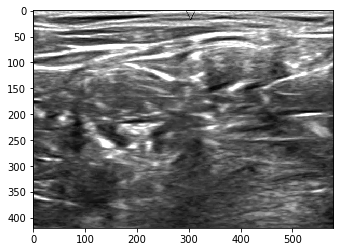

In [16]:
i = random.randint(0,len(dataset))
img, mask = dataset[i]
print(dataset.img_paths[i])
plt.imshow(img, cmap='gray')

/mnt/DL_sw/Data/ultrasound-nerve-segmentation/train_mask/31_38.tif


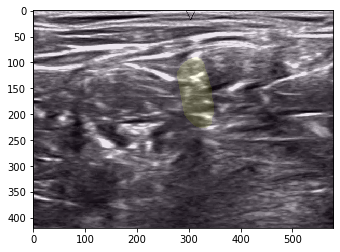

In [17]:
print(dataset.mask_paths[i])
plt.imshow(img, cmap='gray')
plt.imshow(mask, alpha = 0.1)

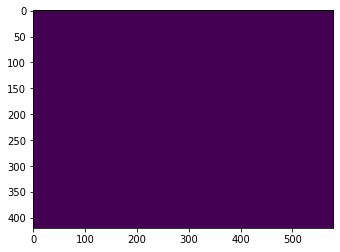

In [83]:
plt.imshow(mask)